## Initial Data Exploration

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv("../data/Telco-Customer-Churn.csv")

# Initial inspection
print(data.head())
data.info()
data.describe()


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Explore the Target Variable (Churn)

#### Count the Values of the Target Variable

In [5]:
churn_counts = data['Churn'].value_counts()
print(churn_counts)


Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### Visualize the Distribution of Churn:

A bar plot is an effective way to visualize class distribution. If one class is much larger than the other, it suggests an imbalance

/var/folders/rk/g05w8qn10hz18ykx_wdn9tl00000gp/T/ipykernel_15597/2761081604.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


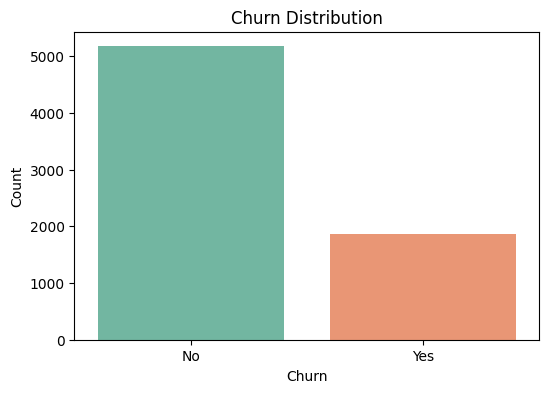

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

##### **Interpretation:** As the Yes and No values are significantly different, there is a class imbalance and this will impact model evaluation and metrics.

## Summarize Key Numerical Features

#### Converting TotalCharges to Float

In [24]:
# Checking for any non-numeric values in 'TotalCharges'
non_numeric_total_charges = data[pd.to_numeric(data['TotalCharges'], errors='coerce').isna()]
print(non_numeric_total_charges[['TotalCharges']])

     TotalCharges
488              
753              
936              
1082             
1340             
3331             
3826             
4380             
5218             
6670             
6754             


In [25]:
# Converting 'TotalCharges' to a numeric column, setting errors='coerce' to handle non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

#### Summary Statistics:

In [27]:
# Summary statistics for numerical features
data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


#### Visualize the Distribution of Numerical Features

Histograms are effective for visualizing the distribution of numerical data. Creating histograms for tenure, MonthlyCharges, and TotalCharges.

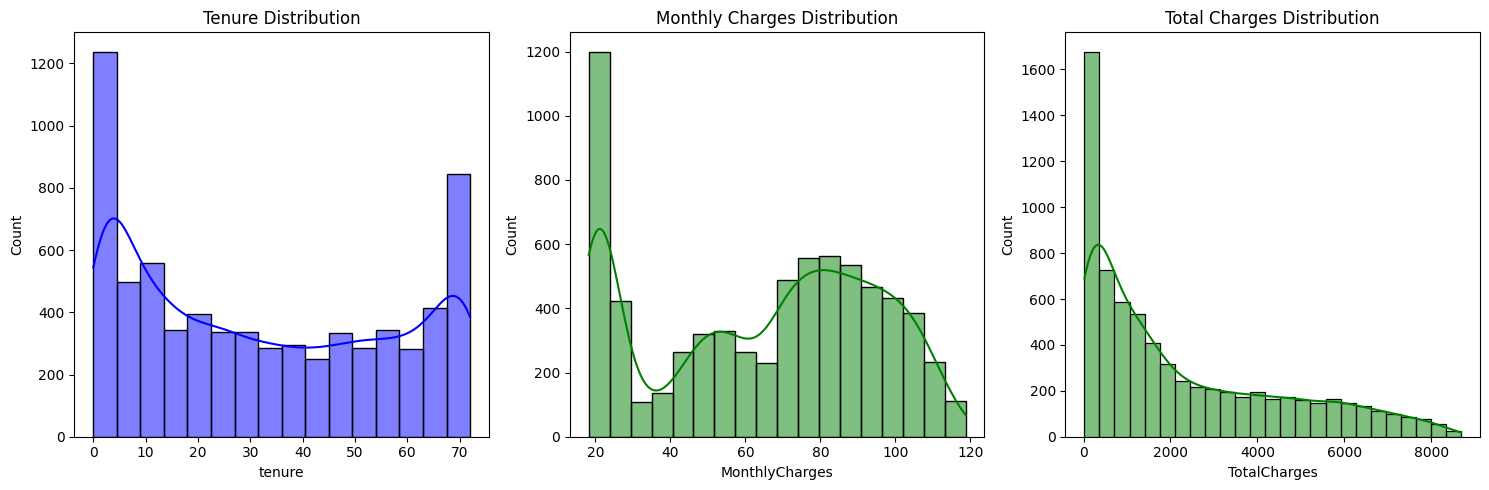

In [29]:
# Histograms for numerical features
plt.figure(figsize=(15, 5))

# Tenure histogram
plt.subplot(1, 3, 1)
sns.histplot(data['tenure'], kde=True, color='blue')
plt.title('Tenure Distribution')

# Monthly Charges histogram
plt.subplot(1, 3, 2)
sns.histplot(data['MonthlyCharges'], kde=True, color='green')
plt.title('Monthly Charges Distribution')

# Total Charges histogram
plt.subplot(1, 3, 3)
sns.histplot(data['TotalCharges'], kde=True, color='green')
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

### Exploratory Data Analysis: Tenure, MonthlyCharges, and TotalCharges

#### 1. Tenure Distribution

- **Observation**: The distribution of `tenure` shows a high concentration of customers with very short tenure (close to 0) and another peak at the maximum tenure. This suggests that there is a mix of new and long-term customers.
- **Inference**: Many customers are new, which could correlate with higher churn risk since new customers may not have a strong commitment. Meanwhile, the peak at maximum tenure suggests a loyal customer segment that has been with the company for a long time.
- **Business Implication**: Retention strategies could focus on engaging new customers through incentives or improved onboarding, as they form a significant portion of the customer base and may be more likely to churn.

#### 2. Monthly Charges Distribution

- **Observation**: `MonthlyCharges` has a bimodal distribution, with peaks at both low and high charge levels. This may indicate different service tiers.
- **Inference**: The bimodal shape could reflect basic vs. premium service plans, where customers with lower monthly charges may represent a lower service tier and higher charges represent premium services. These segments could have different behaviors and churn rates.
- **Business Implication**: The distribution suggests segmentation opportunities, where high-paying customers may expect more personalized services to maintain satisfaction, while lower-paying customers might benefit from offers encouraging plan upgrades.

#### 3. Total Charges Distribution

- **Observation**: `TotalCharges` is right-skewed, with most customers having lower cumulative charges. This aligns with the `tenure` distribution, as many customers are either new or have low total charges.
- **Inference**: The right skew implies that most customers are either new or on lower-tier plans, while the smaller number of high `TotalCharges` may represent long-term or premium-service customers with higher loyalty.
- **Business Implication**: Customers with lower `TotalCharges` may be more likely to churn and might benefit from engagement strategies. On the other hand, high `TotalCharges` customers could be candidates for loyalty rewards to maintain their commitment.

---

### Final Summary
These distributions offer key insights into customer segmentation and retention strategy. By identifying different customer tiers and understanding the distribution of tenure, monthly charges, and cumulative charges, we can tailor retention strategies to specific customer groups, reducing churn and enhancing satisfaction.

## Explore Key Categorical Features

#### Value Counts for Categorical Features

Counting  the values of each category to get a sense of how customers are distributed across categories.

In [30]:
print(data['Contract'].value_counts())
print(data['PaymentMethod'].value_counts())


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


#### Visualize Categorical Features by Churn

Creating count plots for Contract and PaymentMethod, broken down by Churn status. This will show if certain categories have higher churn rates.

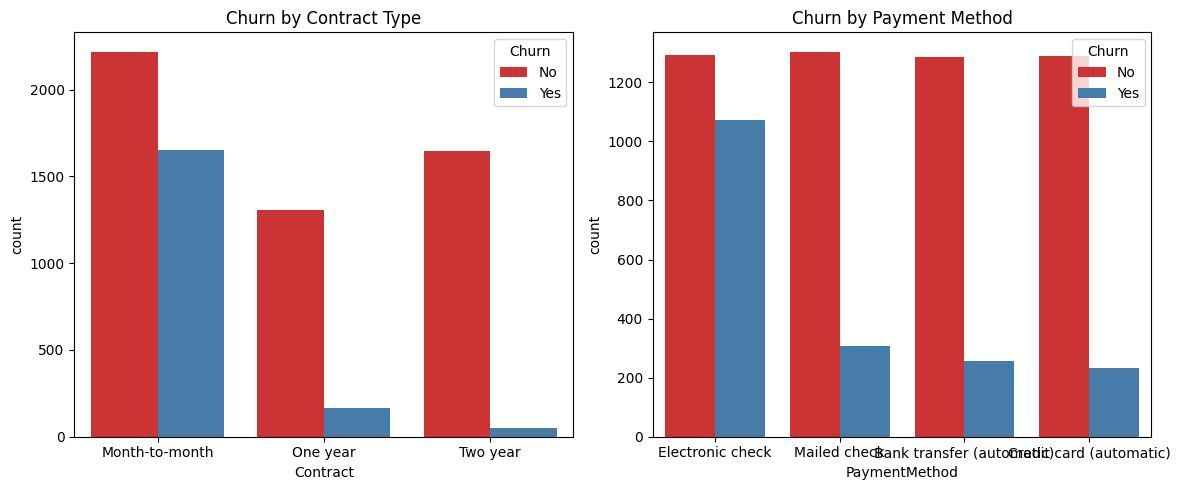

In [31]:

plt.figure(figsize=(12, 5))

# Contract type by churn status
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set1')
plt.title('Churn by Contract Type')

# Payment method by churn status
plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set1')
plt.title('Churn by Payment Method')

plt.tight_layout()
plt.show()

### Churn Analysis by Contract Type and Payment Method

#### 1. Churn by Contract Type
- **Observation**: The majority of churned customers are on month-to-month contracts, while churn rates are significantly lower for one-year and two-year contracts.
- **Inference**: Month-to-month contracts may attract customers with lower commitment levels, increasing churn risk. In contrast, longer-term contracts seem to stabilize customer retention.
- **Business Implication**: To reduce churn, targeted retention efforts could focus on month-to-month customers. Offering incentives to switch to longer contracts may improve retention among this group.

#### 2. Churn by Payment Method
- **Observation**: Customers using Electronic checks have the highest churn rate, while those on automatic payment methods (bank transfer, credit card) show much lower churn rates.
- **Inference**: Manual payment methods like Electronic checks may correlate with higher churn due to the lack of automation. Automatic payments could contribute to retention by making payment a seamless process.
- **Business Implication**: Encouraging customers to enroll in automatic payments could help reduce churn. Discounts or rewards for switching to automated payments might make these options more attractive, especially for Electronic check users.
